# 3. Feature Engineering



## 3.1 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from IPython import display
from ipywidgets import interact, widgets

from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import datetime

## 3.2 Load the Data

In [2]:
dog_df = pd.read_csv('../clean_data/austin_dogs_eda_clean.csv', index_col=0)

In [3]:
dog_df.shape

(55445, 10)

In [4]:
dog_df.head()

,name,breed_category,sex_intake,intake_type,condition_intake,outcome,delta_time_d,month_outcome,year_outcome,age_in_years_bins
0,*Brock,Beagle,Neutered Male,Stray,Normal,Transfer,4.952778,1,2019,2-3 yrs
1,Belle,Spaniel,Spayed Female,Stray,Normal,Return to Owner,0.093056,7,2015,8-9 yrs
2,Runster,Basenji,Intact Male,Stray,Normal,Return to Owner,6.940278,4,2016,0-1 yrs
3,Rio,Doberman,Neutered Male,Stray,Normal,Return to Owner,3.151389,7,2014,4-5 yrs
4,Odin,Labrador Retriever,Neutered Male,Owner Surrender,Normal,Return to Owner,3.206944,2,2017,2-3 yrs


## 3.3 Feature Engineering

#### 3.3.1 One Hot Encoding Categorical Data


In [5]:
dog_one_hot_df = pd.get_dummies(dog_df, columns=['breed_category', 'age_in_years_bins', 'sex_intake', 
                                                 'intake_type', 'condition_intake', 'outcome', 
                                                 'month_outcome', 'year_outcome'])

In [6]:
dog_one_hot_df

,name,delta_time_d,breed_category_Akita,breed_category_Australian Cattle Dog,breed_category_Australian Shepherd,breed_category_Basenji,breed_category_Basset,breed_category_Beagle,breed_category_Bichon,breed_category_Boxer,...,year_outcome_2013,year_outcome_2014,year_outcome_2015,year_outcome_2016,year_outcome_2017,year_outcome_2018,year_outcome_2019,year_outcome_2020,year_outcome_2021,year_outcome_2022
0,*Brock,4.952778,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Belle,0.093056,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Runster,6.940278,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Rio,3.151389,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Odin,3.206944,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55440,Mele,29.027778,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55441,Blu,3.187500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55442,Taffy,0.950000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55443,Layla,0.161806,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


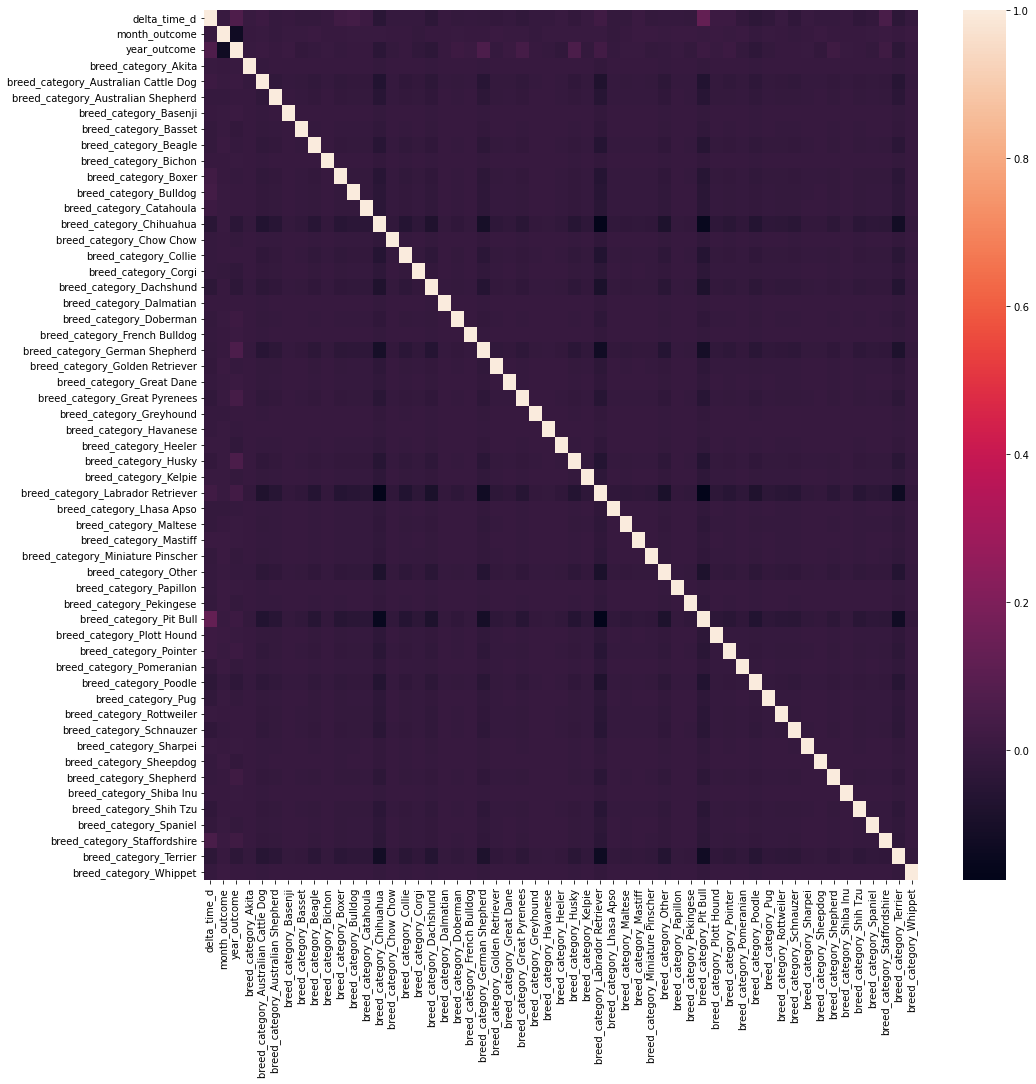

In [7]:
dog_cor_df = pd.get_dummies(dog_df, columns=['breed_category'])
plt.subplots(figsize=(16,16))
sns.heatmap(dog_cor_df.corr());

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dog_one_hot_df.drop(columns='delta_time_d'), 
                                                    dog_one_hot_df.delta_time_d, test_size=0.3, 
                                                    random_state=47)

In [9]:
X_train.shape, X_test.shape

((38811, 117), (16634, 117))

In [10]:
y_train.shape, y_test.shape

((38811,), (16634,))

In [13]:
train_mean = y_train.mean()
train_mean

17.346467442649374

In [14]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[17.34646744]])

NameError: name 'y_te_pred' is not defined